In [54]:
import cv2, os, numpy as np, matplotlib.pyplot as plt

In [55]:
IMAGE_PATH = './PoVeKamon/Images/'
DATA_PATH = IMAGE_PATH + 'Data/'
OBJECT_PATH = IMAGE_PATH + 'Object/'


object_img = [cv2.imread(OBJECT_PATH + img) for img in os.listdir(OBJECT_PATH)]

data = [cv2.imread(DATA_PATH + img) for img in os.listdir(DATA_PATH)]

akaze = cv2.AKAZE_create()
# print(data)

## SINGLE OBJECT CASE

In [56]:
object = IMAGE_PATH + 'Object/Object.png'

object = cv2.imread(object)

object = cv2.cvtColor(object, cv2.COLOR_BGR2RGB)

gray_object = cv2.cvtColor(object, cv2.COLOR_RGB2GRAY)

gray_object = cv2.equalizeHist(gray_object)

gray_object = cv2.medianBlur(gray_object, 5)

object_keypoint, object_descriptor = akaze.detectAndCompute(gray_object, None)
object_descriptor = np.float32(object_descriptor)

In [57]:
best_matches = 0

for index, img in enumerate(data):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gray_data = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    gray_data = cv2.equalizeHist(gray_data)

    gray_data = cv2.GaussianBlur(gray_data, (3,3), 0)

    data_keypoint, data_descriptor = akaze.detectAndCompute(gray_data, None)

    data_descriptor = np.float32(data_descriptor)

    flann = cv2.FlannBasedMatcher(dict(algorithm=1), dict(checks=50))

    match = flann.knnMatch(object_descriptor, data_descriptor, 2)

    matchesmask = [[0,0] for _ in range(len(match))]

    current_matches = 0
    for i, (fm, sm) in enumerate(match):
        if fm.distance < 0.7 * sm.distance:
            matchesmask[i] = [1,0]
            current_matches += 1
    if best_matches < current_matches:
        best_matches = current_matches
        data_best_match = {
            "image": img,
            "keypoint":data_keypoint,
            "descriptor":data_descriptor,
            "match":match,
            "matchesmask":matchesmask
        }

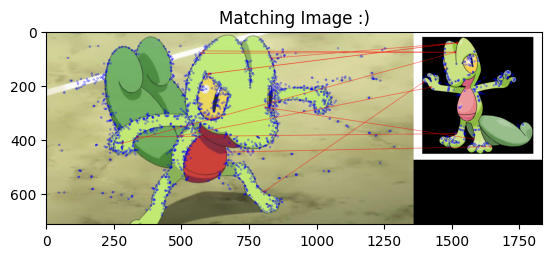

In [58]:
result = cv2.drawMatchesKnn(
    object, 
    object_keypoint, 
    data_best_match['image'], 
    data_best_match['keypoint'], 
    matches1to2=data_best_match['match'], 
    outImg=None, 
    matchColor=[255,0,0], 
    singlePointColor=[0,0,255], 
    matchesMask=data_best_match['matchesmask']
)

plt.figure()
plt.imshow(result)
plt.title('Matching Image :)')
plt.show()

## MULTIPLE OBJECT CASE

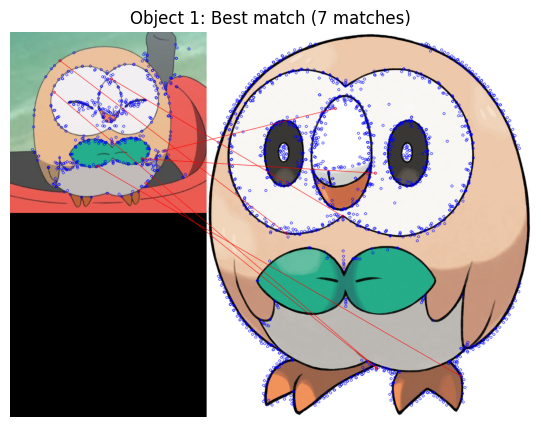

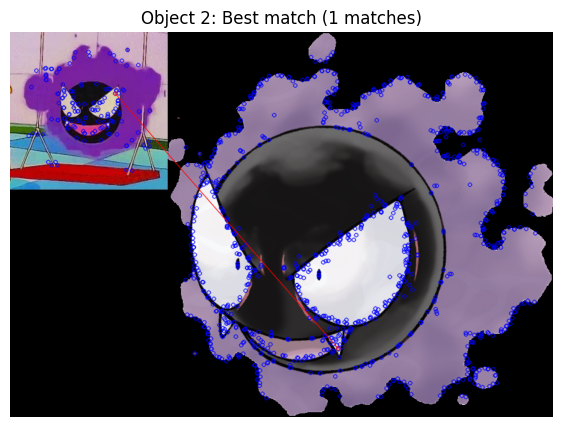

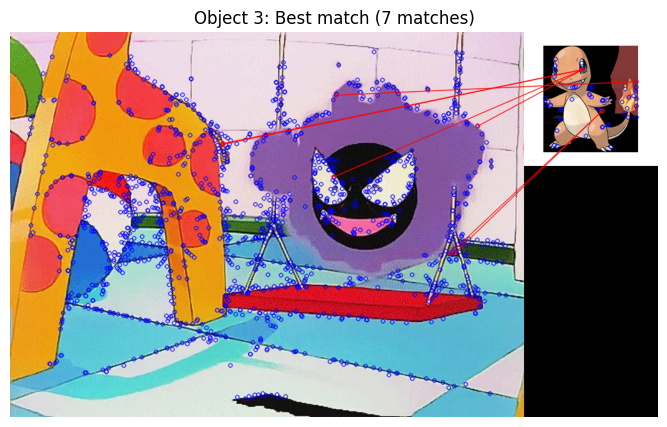

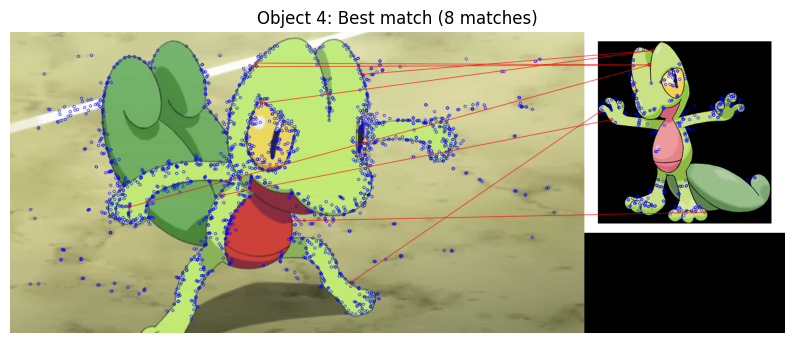

In [59]:
for idx, obj in enumerate(object_img):
    if obj is None:
        continue
    obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)

    gray_object = cv2.cvtColor(obj, cv2.COLOR_RGB2GRAY)

    gray_object = cv2.equalizeHist(gray_object)

    gray_object = cv2.medianBlur(gray_object, 5)

    object_keypoint, object_descriptor = akaze.detectAndCompute(gray_object, None)

    object_descriptor = np.float32(object_descriptor)

    best_matches = 0
    best_result = None
    data_best_match = None

    for index, img in enumerate(data):
    
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        gray_data = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        gray_data = cv2.equalizeHist(gray_data)

        gray_data = cv2.GaussianBlur(gray_data, (3,3), 0)

        data_keypoint, data_descriptor = akaze.detectAndCompute(gray_data, None)

        data_descriptor = np.float32(data_descriptor)

        flann = cv2.FlannBasedMatcher(dict(algorithm=1), dict(checks=50))

        match = flann.knnMatch(object_descriptor, data_descriptor, 2)

        matchesmask = [[0,0] for _ in range(len(match))]

        current_matches = 0
        for i, (fm, sm) in enumerate(match):
            if fm.distance < 0.7 * sm.distance:
                matchesmask[i] = [1,0]
                current_matches += 1
        if best_matches < current_matches:
            best_matches = current_matches
            data_best_match = {
                "image": img,
                "keypoint":data_keypoint,
                "descriptor":data_descriptor,
                "match":match,
                "matchesmask":matchesmask
            }
    if data_best_match is None:
        continue
    else:
        result = cv2.drawMatchesKnn(
            obj, 
            object_keypoint, 
            data_best_match['image'], 
            data_best_match['keypoint'], 
            matches1to2=data_best_match['match'], 
            outImg=None, 
            matchColor=[255,0,0], 
            singlePointColor=[0,0,255], 
            matchesMask=data_best_match['matchesmask']
        )

        plt.figure(figsize=(10,5))
        plt.imshow(result)
        plt.title(f'Object {idx+1}: Best match ({best_matches} matches)')
        plt.axis('off')
        plt.show()